<a href="https://colab.research.google.com/github/wakamatsuikuma/scratch-deeplearning/blob/main/Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# coding: utf-8

import sys, os
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/dataset")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/common")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/Ch4")

import numpy as np
from mnist import load_mnist
from PIL import Image
from IPython.display import display
import pickle
from functions import sigmoid, softmax
from two_layer_net import TwoLayerNet


# グーグルコラボなので画像表示はこれ使う
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    display(pil_img)

# ファイルをアップロード
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
"""
確率的勾配降下法のモジュール実装
"""

class SGD:
  # コンストラクタでは学習率を初期化
  def __init__(self, lr=0.01):
    self.lr = lr

  # 学習では、引数に重みパラメータと勾配をディクショナリ変数で指定
  def update(self, param, grads):
    for key in param.keys():
      param[key] -= self.lr * garads[key]


In [ ]:
"""
Momentumのモジュール実装
 vは速度であり、勾配方向に力を受け、その力によって速度が加算されていくイメージ
 SGDではその座標での勾配ベクトル分だけ移動していたが、Momentumではその座標で受けている力も加味される。
 →傾斜がゆるくても起伏がなければどんどん大きくなり、傾斜がきつくても起伏があれば安定しない　（＝行き過ぎない）？？
"""

class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None # 何も保持しないでおく。意味はわからん。
  
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    
    for key in params.kesy():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]


In [ ]:
"""
AdamGradのモジュール実装
  学習係数の減衰の手法。学習係数を勾配の要素ごとの乗算を保持した値の平方根で割ることで、
  よく動いた要素はより小さくなるようにしている。
"""
class Momentum:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.ｈ = None # 何も保持しないでおく。意味はわからん。
  
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0で除算するのを防ぐ

===========iteration:0===========
SGD:2.4926326643136045
Momentum:2.3414673503214116
AdaGrad:2.268675607196987
Adam:2.1563959867948244
===========iteration:100===========
SGD:1.568481801156036
Momentum:0.5323710871638367
AdaGrad:0.19902658579372354
Adam:0.35496460967711013
===========iteration:200===========
SGD:0.8478762718656939
Momentum:0.28615506840828564
AdaGrad:0.10759635915427085
Adam:0.12732832885576895
===========iteration:300===========
SGD:0.5346149679270381
Momentum:0.15986458038623574
AdaGrad:0.048303796040715524
Adam:0.10033005940172032
===========iteration:400===========
SGD:0.3816217581392449
Momentum:0.11408754482834849
AdaGrad:0.039073514280070616
Adam:0.10241082385566252
===========iteration:500===========
SGD:0.39302475733622216
Momentum:0.18760992813549815
AdaGrad:0.0738530057232244
Adam:0.09996495487307719
===========iteration:600===========
SGD:0.5118205977938011
Momentum:0.20422053199031848
AdaGrad:0.10823972802818804
Adam:0.1455249269554414
===========iteration

Text(0, 0.5, 'loss')

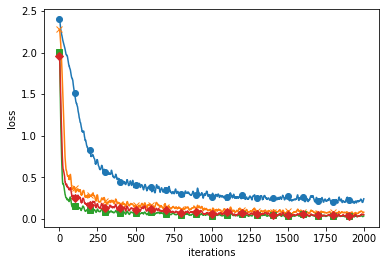

In [ ]:
"""
最適化手法の比較。MNISTデータで。
　　　コード追うの厳しい。。。とりあえず結果確認のみ。
"""



# coding: utf-8
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10) # 活性化関数にはReLu、
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")

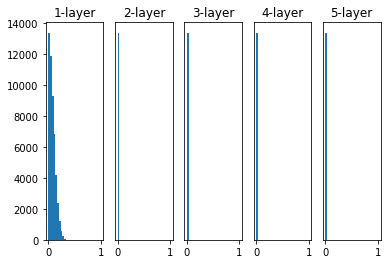

In [ ]:
"""
アクティベーション分布の確認
"""

# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


===========iteration:0===========
std=0.01:2.3025005890136723
Xavier:2.28742035246983
He:2.3288600647714706
===========iteration:100===========
std=0.01:2.301475564103388
Xavier:2.185037668321559
He:1.739104611108643
===========iteration:200===========
std=0.01:2.3013739544559133
Xavier:1.9097629031644594
He:0.8995152383168162
===========iteration:300===========
std=0.01:2.3023715634107624
Xavier:1.3425770589617398
He:0.5161416070837579
===========iteration:400===========
std=0.01:2.3027156416166488
Xavier:0.9853394198263553
He:0.4382876292989888
===========iteration:500===========
std=0.01:2.2957913993875545
Xavier:0.6731117550204038
He:0.41579164103323585
===========iteration:600===========
std=0.01:2.29823434263707
Xavier:0.5121939318714686
He:0.29519260835076305
===========iteration:700===========
std=0.01:2.3006963662892104
Xavier:0.4696521275892075
He:0.3048692769277434
===========iteration:800===========
std=0.01:2.3068827156384275
Xavier:0.4809886128854871
He:0.3119741843513803

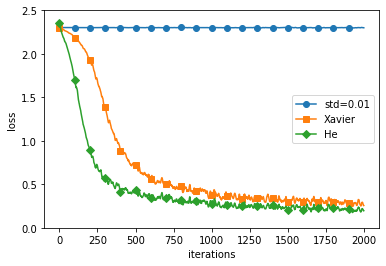

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'} # 各活性化関数に適した初期値で比較
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    # ネットワークを設計。初期重みも。
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    # データをバッチ抽出
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 学習=勾配を更新(今回はSGDで。設計したネットワークで推定、損失関数求める、そのときの勾配求める、重みとバイアスをそれぞれ更新・保持→次のバッチデータでまた以上を繰り返す)
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

batch normalizationの計算グラフの説明

https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html

活性化関数の前後どちらに挿入するべきかの文献
https://arxiv.org/abs/1502.03167

https://arxiv.org/abs/1511.06422

============== 1/16 ==============
epoch:0 | 0.097 - 0.122


/content/drive/MyDrive/ゼロからつくるディープラーニング/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/MyDrive/ゼロからつくるディープラーニング/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.136
epoch:2 | 0.097 - 0.14
epoch:3 | 0.097 - 0.158
epoch:4 | 0.097 - 0.189
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.231
epoch:7 | 0.097 - 0.254
epoch:8 | 0.097 - 0.269
epoch:9 | 0.097 - 0.287
epoch:10 | 0.097 - 0.316
epoch:11 | 0.097 - 0.338
epoch:12 | 0.097 - 0.349
epoch:13 | 0.097 - 0.369
epoch:14 | 0.097 - 0.387
epoch:15 | 0.097 - 0.398
epoch:16 | 0.097 - 0.41
epoch:17 | 0.097 - 0.44
epoch:18 | 0.097 - 0.446


epoch:19 | 0.097 - 0.456
============== 2/16 ==============
epoch:0 | 0.094 - 0.07


/content/drive/MyDrive/ゼロからつくるディープラーニング/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/MyDrive/ゼロからつくるディープラーニング/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.079
epoch:2 | 0.097 - 0.114
epoch:3 | 0.097 - 0.129
epoch:4 | 0.097 - 0.158
epoch:5 | 0.097 - 0.183
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.253
epoch:8 | 0.097 - 0.275
epoch:9 | 0.097 - 0.302
epoch:10 | 0.097 - 0.312
epoch:11 | 0.097 - 0.337
epoch:12 | 0.097 - 0.368
epoch:13 | 0.097 - 0.374
epoch:14 | 0.097 - 0.406
epoch:15 | 0.097 - 0.416
epoch:16 | 0.097 - 0.436
epoch:17 | 0.097 - 0.455
epoch:18 | 0.097 - 0.47


epoch:19 | 0.097 - 0.492
============== 3/16 ==============
epoch:0 | 0.168 - 0.171
epoch:1 | 0.368 - 0.159
epoch:2 | 0.501 - 0.184
epoch:3 | 0.59 - 0.228
epoch:4 | 0.652 - 0.261
epoch:5 | 0.697 - 0.297
epoch:6 | 0.756 - 0.334
epoch:7 | 0.813 - 0.36
epoch:8 | 0.848 - 0.401
epoch:9 | 0.882 - 0.441
epoch:10 | 0.878 - 0.468
epoch:11 | 0.915 - 0.491
epoch:12 | 0.934 - 0.51
epoch:13 | 0.942 - 0.532
epoch:14 | 0.949 - 0.56
epoch:15 | 0.958 - 0.588
epoch:16 | 0.964 - 0.609
epoch:17 | 0.966 - 0.622
epoch:18 | 0.968 - 0.638


epoch:19 | 0.973 - 0.657
============== 4/16 ==============
epoch:0 | 0.128 - 0.089
epoch:1 | 0.293 - 0.109
epoch:2 | 0.435 - 0.213
epoch:3 | 0.528 - 0.307
epoch:4 | 0.576 - 0.357
epoch:5 | 0.656 - 0.425
epoch:6 | 0.676 - 0.485
epoch:7 | 0.722 - 0.527
epoch:8 | 0.739 - 0.573
epoch:9 | 0.759 - 0.596
epoch:10 | 0.784 - 0.626
epoch:11 | 0.796 - 0.657
epoch:12 | 0.803 - 0.681
epoch:13 | 0.821 - 0.697
epoch:14 | 0.816 - 0.72
epoch:15 | 0.834 - 0.734
epoch:16 | 0.842 - 0.75
epoch:17 | 0.854 - 0.766
epoch:18 | 0.854 - 0.784


epoch:19 | 0.876 - 0.796
============== 5/16 ==============
epoch:0 | 0.117 - 0.078
epoch:1 | 0.124 - 0.115
epoch:2 | 0.128 - 0.221
epoch:3 | 0.135 - 0.345
epoch:4 | 0.138 - 0.44
epoch:5 | 0.142 - 0.531
epoch:6 | 0.164 - 0.585
epoch:7 | 0.179 - 0.638
epoch:8 | 0.193 - 0.685
epoch:9 | 0.207 - 0.723
epoch:10 | 0.215 - 0.748
epoch:11 | 0.239 - 0.774
epoch:12 | 0.257 - 0.801
epoch:13 | 0.259 - 0.82
epoch:14 | 0.268 - 0.831
epoch:15 | 0.271 - 0.842
epoch:16 | 0.28 - 0.858
epoch:17 | 0.288 - 0.866
epoch:18 | 0.302 - 0.885


epoch:19 | 0.314 - 0.887
============== 6/16 ==============
epoch:0 | 0.102 - 0.091
epoch:1 | 0.124 - 0.216
epoch:2 | 0.124 - 0.4
epoch:3 | 0.161 - 0.54
epoch:4 | 0.142 - 0.63
epoch:5 | 0.117 - 0.689
epoch:6 | 0.118 - 0.75
epoch:7 | 0.117 - 0.772
epoch:8 | 0.117 - 0.817
epoch:9 | 0.162 - 0.833
epoch:10 | 0.137 - 0.849
epoch:11 | 0.13 - 0.876
epoch:12 | 0.165 - 0.885
epoch:13 | 0.149 - 0.897
epoch:14 | 0.157 - 0.914
epoch:15 | 0.181 - 0.914
epoch:16 | 0.154 - 0.93
epoch:17 | 0.12 - 0.936
epoch:18 | 0.119 - 0.949


epoch:19 | 0.117 - 0.955
============== 7/16 ==============
epoch:0 | 0.119 - 0.091
epoch:1 | 0.115 - 0.334
epoch:2 | 0.116 - 0.575
epoch:3 | 0.117 - 0.697
epoch:4 | 0.117 - 0.743
epoch:5 | 0.117 - 0.793
epoch:6 | 0.117 - 0.822
epoch:7 | 0.117 - 0.863
epoch:8 | 0.117 - 0.879
epoch:9 | 0.117 - 0.898
epoch:10 | 0.117 - 0.919
epoch:11 | 0.117 - 0.941
epoch:12 | 0.117 - 0.952
epoch:13 | 0.121 - 0.963
epoch:14 | 0.116 - 0.969
epoch:15 | 0.16 - 0.975
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.987


epoch:19 | 0.117 - 0.991
============== 8/16 ==============
epoch:0 | 0.1 - 0.14
epoch:1 | 0.117 - 0.505
epoch:2 | 0.117 - 0.62
epoch:3 | 0.117 - 0.737
epoch:4 | 0.117 - 0.811
epoch:5 | 0.117 - 0.878
epoch:6 | 0.117 - 0.932
epoch:7 | 0.116 - 0.95
epoch:8 | 0.117 - 0.957
epoch:9 | 0.117 - 0.977
epoch:10 | 0.116 - 0.979
epoch:11 | 0.116 - 0.985
epoch:12 | 0.116 - 0.991
epoch:13 | 0.117 - 0.993
epoch:14 | 0.116 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997


epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.097 - 0.172
epoch:1 | 0.117 - 0.505
epoch:2 | 0.117 - 0.715
epoch:3 | 0.117 - 0.827
epoch:4 | 0.117 - 0.879
epoch:5 | 0.117 - 0.931
epoch:6 | 0.117 - 0.968
epoch:7 | 0.117 - 0.976
epoch:8 | 0.117 - 0.979
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.116 - 0.092
epoch:1 | 0.117 - 0.542
epoch:2 | 0.117 - 0.699
epoch:3 | 0.117 - 0.824
epoch:4 | 0.117 - 0.92
epoch:5 | 0.117 - 0.967
epoch:6 | 0.117 - 0.963
epoch:7 | 0.117 - 0.982
epoch:8 | 0.117 - 0.985
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.999
epoch:11 | 0.117 - 0.999
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.092 - 0.183
epoch:1 | 0.117 - 0.538
epoch:2 | 0.117 - 0.807
epoch:3 | 0.117 - 0.793
epoch:4 | 0.117 - 0.834
epoch:5 | 0.116 - 0.839
epoch:6 | 0.117 - 0.852
epoch:7 | 0.117 - 0.876
epoch:8 | 0.117 - 0.886
epoch:9 | 0.117 - 0.875
epoch:10 | 0.117 - 0.849
epoch:11 | 0.117 - 0.895
epoch:12 | 0.117 - 0.912
epoch:13 | 0.117 - 0.978
epoch:14 | 0.116 - 0.978
epoch:15 | 0.116 - 0.987
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.997
epoch:18 | 0.116 - 0.998
epoch:19 | 0.116 - 0.999


============== 12/16 ==============
epoch:0 | 0.1 - 0.148
epoch:1 | 0.117 - 0.546
epoch:2 | 0.117 - 0.729
epoch:3 | 0.117 - 0.637
epoch:4 | 0.117 - 0.759
epoch:5 | 0.116 - 0.84
epoch:6 | 0.116 - 0.777
epoch:7 | 0.116 - 0.826
epoch:8 | 0.116 - 0.863
epoch:9 | 0.116 - 0.869
epoch:10 | 0.116 - 0.865
epoch:11 | 0.116 - 0.875
epoch:12 | 0.116 - 0.881
epoch:13 | 0.116 - 0.885
epoch:14 | 0.116 - 0.859
epoch:15 | 0.116 - 0.887
epoch:16 | 0.116 - 0.896
epoch:17 | 0.116 - 0.897
epoch:18 | 0.116 - 0.904


epoch:19 | 0.116 - 0.82
============== 13/16 ==============
epoch:0 | 0.097 - 0.12
epoch:1 | 0.1 - 0.51
epoch:2 | 0.117 - 0.43
epoch:3 | 0.117 - 0.574
epoch:4 | 0.116 - 0.598
epoch:5 | 0.116 - 0.603
epoch:6 | 0.116 - 0.68
epoch:7 | 0.116 - 0.686
epoch:8 | 0.117 - 0.694
epoch:9 | 0.117 - 0.701
epoch:10 | 0.117 - 0.705
epoch:11 | 0.117 - 0.7
epoch:12 | 0.117 - 0.708
epoch:13 | 0.117 - 0.791
epoch:14 | 0.117 - 0.8
epoch:15 | 0.117 - 0.801
epoch:16 | 0.117 - 0.759
epoch:17 | 0.117 - 0.804
epoch:18 | 0.117 - 0.814


epoch:19 | 0.117 - 0.84
============== 14/16 ==============
epoch:0 | 0.092 - 0.114
epoch:1 | 0.116 - 0.365
epoch:2 | 0.116 - 0.445
epoch:3 | 0.116 - 0.462
epoch:4 | 0.116 - 0.483
epoch:5 | 0.116 - 0.496
epoch:6 | 0.116 - 0.488
epoch:7 | 0.116 - 0.497
epoch:8 | 0.116 - 0.563
epoch:9 | 0.116 - 0.591
epoch:10 | 0.116 - 0.587
epoch:11 | 0.116 - 0.594
epoch:12 | 0.116 - 0.597
epoch:13 | 0.116 - 0.596
epoch:14 | 0.116 - 0.602
epoch:15 | 0.117 - 0.601
epoch:16 | 0.117 - 0.586
epoch:17 | 0.117 - 0.602
epoch:18 | 0.117 - 0.583


epoch:19 | 0.116 - 0.598
============== 15/16 ==============
epoch:0 | 0.092 - 0.094
epoch:1 | 0.116 - 0.359
epoch:2 | 0.116 - 0.453
epoch:3 | 0.117 - 0.469
epoch:4 | 0.117 - 0.495
epoch:5 | 0.117 - 0.484
epoch:6 | 0.117 - 0.504
epoch:7 | 0.117 - 0.504
epoch:8 | 0.117 - 0.515
epoch:9 | 0.117 - 0.52
epoch:10 | 0.117 - 0.503
epoch:11 | 0.117 - 0.52
epoch:12 | 0.116 - 0.515
epoch:13 | 0.116 - 0.521
epoch:14 | 0.116 - 0.517
epoch:15 | 0.116 - 0.483
epoch:16 | 0.116 - 0.516
epoch:17 | 0.116 - 0.523
epoch:18 | 0.116 - 0.517


epoch:19 | 0.116 - 0.521
============== 16/16 ==============
epoch:0 | 0.1 - 0.135
epoch:1 | 0.116 - 0.212
epoch:2 | 0.116 - 0.3
epoch:3 | 0.116 - 0.282
epoch:4 | 0.116 - 0.391
epoch:5 | 0.116 - 0.41
epoch:6 | 0.116 - 0.423
epoch:7 | 0.116 - 0.421
epoch:8 | 0.116 - 0.427
epoch:9 | 0.116 - 0.423
epoch:10 | 0.116 - 0.421
epoch:11 | 0.117 - 0.425
epoch:12 | 0.116 - 0.425
epoch:13 | 0.116 - 0.429
epoch:14 | 0.117 - 0.433
epoch:15 | 0.117 - 0.427
epoch:16 | 0.117 - 0.38
epoch:17 | 0.117 - 0.424
epoch:18 | 0.117 - 0.423
epoch:19 | 0.117 - 0.419


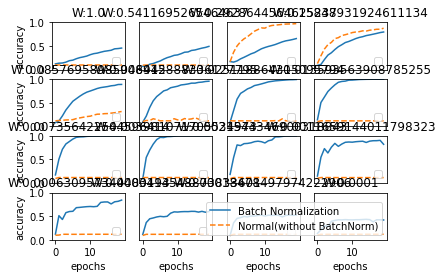

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    # batch normalization有り無しのネットワークを生成しておく
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    
    optimizer = SGD(lr=learning_rate)
    

    train_acc_list = []
    bn_train_acc_list = []
    

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):

        # バッチデータ抽出
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 学習フェーズ＝勾配計算(重みパラメータ、バイアスに対する損失関数の微分)→重みパラメータ、バイアス更新。
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.11333333333333333, test acc:0.103
epoch:1, train acc:0.11666666666666667, test acc:0.1109
epoch:2, train acc:0.13, test acc:0.1307
epoch:3, train acc:0.16, test acc:0.1587
epoch:4, train acc:0.20333333333333334, test acc:0.1853
epoch:5, train acc:0.24666666666666667, test acc:0.1987
epoch:6, train acc:0.29, test acc:0.2228
epoch:7, train acc:0.33, test acc:0.2443
epoch:8, train acc:0.35333333333333333, test acc:0.2768
epoch:9, train acc:0.39666666666666667, test acc:0.299
epoch:10, train acc:0.44666666666666666, test acc:0.3262
epoch:11, train acc:0.5, test acc:0.3606
epoch:12, train acc:0.5333333333333333, test acc:0.3863
epoch:13, train acc:0.5966666666666667, test acc:0.4184
epoch:14, train acc:0.6, test acc:0.4337
epoch:15, train acc:0.6366666666666667, test acc:0.4581
epoch:16, train acc:0.6433333333333333, test acc:0.473
epoch:17, train acc:0.66, test acc:0.4757
epoch:18, train acc:0.6633333333333333, test acc:0.4976
epoch:19, train acc:0.6633333333333333, te

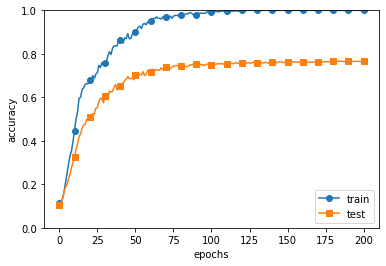

In [ ]:
"""
過学習の確認
・レイヤを多く（＝パラメータが多くなり、表現力上がる）
・訓練データ少なく
"""
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [11]:
"""
Dropoutレイヤの実装
"""

class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    

    # 条件分岐なくても良さそうやけど？
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

ストリーミング出力は最後の 5000 行に切り捨てられました。
train loss:0.6747694217886924
train loss:0.7121376102658473
train loss:0.6864512611260287
train loss:0.6300396544707814
train loss:0.6231774596640357
=== epoch:148, train acc:0.8, test acc:0.7339 ===
train loss:0.8407558931863237
train loss:0.8036859380603866
train loss:0.8109791567523746
train loss:0.7342173155144647
train loss:0.8080377931695328
train loss:0.7996035962694534
train loss:0.8096076290124308
train loss:0.6773202940575226
train loss:0.7117805413872605
train loss:0.8302376106704351
=== epoch:149, train acc:0.804, test acc:0.7378 ===
train loss:0.5653551653558582
train loss:0.705050560538453
train loss:0.7555044054170631
train loss:0.5870638401424716
train loss:0.7318423298393754
train loss:0.8759437849384791
train loss:0.8043707037004961
train loss:0.7620354205722231
train loss:0.6383554314278364
train loss:0.8813204468446884
=== epoch:150, train acc:0.78, test acc:0.7304 ===
train loss:0.7557861764186107
train loss:0.6960895808951263
train 

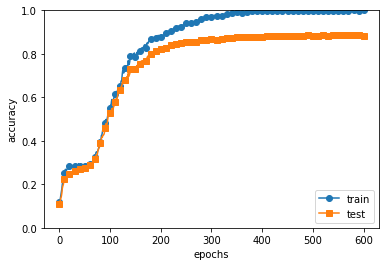

In [21]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  
# Dropoutなしのときの場合はFalseに(test acc:0.8609) Trueでtest acc:0.8851
# データ数が300では精度低かったため、ある程度のデータ量がないと有効でないのかも

dropout_ratio = 0.2
# ====================================================
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,

                  epochs=601, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.68 | lr:0.006032773171371581, weight decay:5.9451103296846924e-05
val acc:0.75 | lr:0.00734563505417722, weight decay:3.4982681023798305e-06
val acc:0.33 | lr:0.002380892942187949, weight decay:2.3302649665211884e-07
val acc:0.26 | lr:0.001546435795697157, weight decay:9.142745445185679e-05
val acc:0.75 | lr:0.00917025995582448, weight decay:1.9330692185316456e-05
val acc:0.12 | lr:0.00018726128088162005, weight decay:5.393340184912176e-07
val acc:0.08 | lr:9.100633798559106e-06, weight decay:3.483978692325686e-08
val acc:0.7 | lr:0.008014329090042861, weight decay:2.1137383249158372e-05
val acc:0.18 | lr:0.0005100242133954801, weight decay:4.932845208576917e-07
val acc:0.68 | lr:0.0060742355654829945, weight decay:3.2381611414337716e-06
val acc:0.25 | lr:0.0012958385019852764, weight decay:4.285639259390181e-08
val acc:0.03 | lr:0.0007073125688744968, weight decay:6.154142532890233e-08
val acc:0.12 | lr:4.068871395482677e-06, weight decay:7.303457964669094e-08
val acc:0.19 |

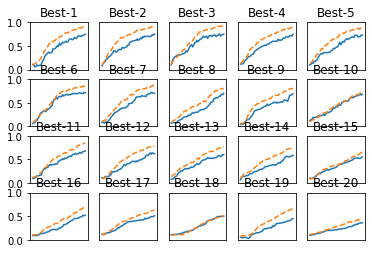

In [6]:
"""
ハイパーパラメータ最適化の実装
"""
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import MultiLayerNet
from util import shuffle_dataset
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay) # weight_decay係数の初期値は0
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False) # 学習係数の初期値は0.01
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索(初期値でパラメータ探索してから)======================================
optimization_trial = 100 #100組み合わせ探索する
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したいハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

"""
一回目
Best-1(val acc:0.75) | lr:0.00734563505417722, weight decay:3.4982681023798305e-06
Best-2(val acc:0.75) | lr:0.00917025995582448, weight decay:1.9330692185316456e-05
Best-3(val acc:0.75) | lr:0.009696137955062318, weight decay:3.443040108251928e-08
Best-4(val acc:0.75) | lr:0.009371095391258326, weight decay:2.7044651353312123e-06
Best-5(val acc:0.73) | lr:0.007988144265542188, weight decay:3.0601071330310714e-06
→lr:0.007~0.01ぐらいか、weight decay:10 ** np.random.uniform(-8, -6)ぐらいか
"""
